# <font color='#66bff'>Titanic - Machine Learning from Disaster
---
</font>

*@ Jorge Alberto Tovar Jiménez*

## <font color='#66c'>Intro:</font>

*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

*While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.*

<img src='./TITANIC.png' width=600px />

**KAGGLE CHALLENGE:**

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.<br/>
Info: https://www.kaggle.com/competitions/titanic/

## <font color='#66c'>3 Different Machine Learning models to make predictions:</font>

### Data to create the model:

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('./train.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Cleaning Data:

In [17]:
df = df.dropna(subset='Embarked')
df = df.fillna({'Age': df.Age.mean()})
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

d1 = {'S':1, 'C':2, 'Q':3}
df.Embarked = df.Embarked.map(d1)
d2 = {'female':0, 'male':1}
df.Sex = df.Sex.map(d2)

X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y = df['Survived']
y = y.astype('str')

### **Model 1: DecisionTreeClassifier()**

Model:

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

modelTree = DecisionTreeClassifier()
paramsTree = {
    'max_depth': (4,5,6),
    'criterion': ('gini', 'entropy',"log_loss"),
    'min_samples_split':(2,3,4),
    'min_samples_leaf': (5,10),
    'random_state': ([11])
}

best_accTree = 0
best_parTree = {}
szTree = 0.20
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=szTree, random_state=i, shuffle=True, stratify=y)
    myGridTree = GridSearchCV(estimator=modelTree, param_grid=paramsTree, scoring='accuracy')
    myGridTree.fit(X_train,y_train)
    yhat = myGridTree.predict(X_test)
    accuracyTree = accuracy_score(yhat, y_test)*100
    if accuracyTree > best_accTree:
        best_parTree = {
            'best_params': myGridTree.best_params_,
            'accuracy': accuracyTree,
            'random_state_for_split': i,
        }
        best_accTree = accuracyTree
        best_modelTree = myGridTree.best_estimator_

print(f"model criterion {best_parTree['best_params']['criterion']}")
print(f"model max_depth {best_parTree['best_params']['max_depth']}")
print(f"model min_samples_leaf {best_parTree['best_params']['min_samples_leaf']}")
print(f"model min_samples_split {best_parTree['best_params']['min_samples_split']}")
print(f"model random_state {best_parTree['best_params']['random_state']}")
print(f"model accuracy {round(best_parTree['accuracy'],2)} %")
print(f"split random_state {best_parTree['random_state_for_split']}")

best_modelTree

model criterion entropy
model max_depth 4
model min_samples_leaf 5
model min_samples_split 2
model random_state 11
model accuracy 88.2 %
split random_state 15


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=11)

Plot:

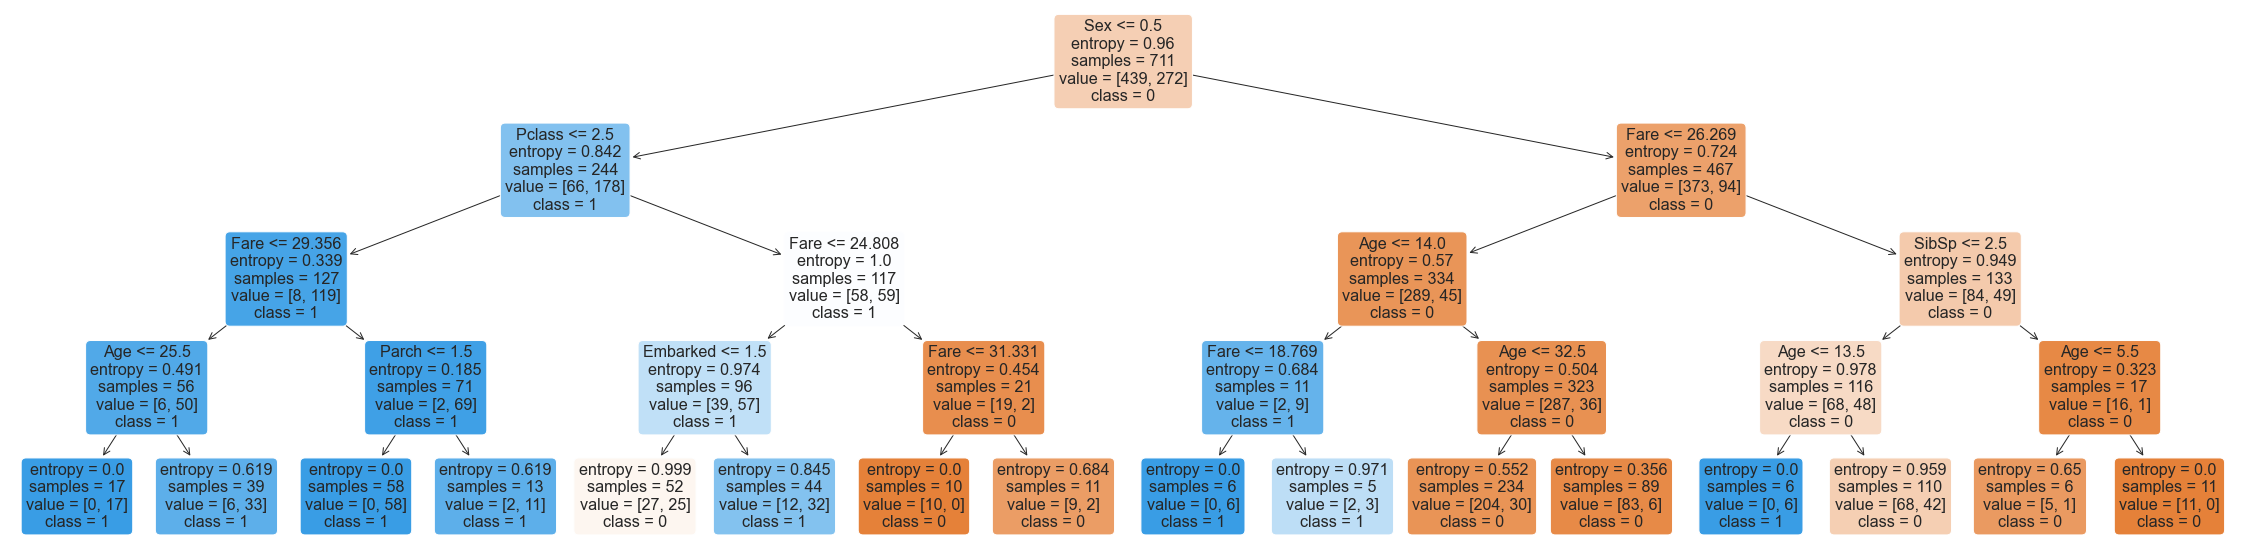

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,10)) 

plot_tree(best_modelTree, feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], class_names=best_modelTree.classes_, filled=True, rounded=True)
plt.show()

### **Model 2: Support Vector Classifier SVC()**

Model:

In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

modelSVM = svm.SVC()
paramsSVM = {
    'kernel': (['rbf', 'poly']),
    'C': ([100]),
    'random_state': ([11])
}

best_accSVM = 0
best_parSVM = {}
szSVM = 0.20
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=szSVM, random_state=i, shuffle=True, stratify=y)
    myGridSVM = GridSearchCV(estimator=modelSVM, param_grid=paramsSVM, scoring='accuracy')
    myGridSVM.fit(X_train, y_train)
    yhat = myGridSVM.predict(X_test)
    accuracySVM = accuracy_score(yhat, y_test)*100
    if accuracySVM > best_accSVM:
        best_parSVM = {
            'best_params': myGridSVM.best_params_,
            'accuracy': accuracySVM,
            'random_state_for_split': i
        }
        best_accSVM = accuracySVM
        best_modelSVM = myGridSVM.best_estimator_


print(f"model kernel {best_parSVM['best_params']['kernel']}")
print(f"model C {best_parSVM['best_params']['C']}")
print(f"model random_state {best_parSVM['best_params']['random_state']}")
print(f"model accuracy {round(best_parSVM['accuracy'],2)} %")
print(f"split random_state {best_parSVM['random_state_for_split']}")

best_modelSVM

model kernel rbf
model C 100
model random_state 11
model accuracy 87.08 %
split random_state 18


SVC(C=100, random_state=11)

### **Model 3: KNeighborsClassifier()**

Model:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier()
paramsKNN = {
    'n_neighbors': ([17,21,25]),
    'algorithm': (['ball_tree', 'kd_tree', 'brute']),
    'weights': (['uniform','distance'])
}

best_accKNN = 0
best_parKNN = {}
szKNN = 0.20

for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=szKNN, random_state=i, shuffle=True, stratify=y)
    myGridKNN = GridSearchCV(estimator=modelKNN, param_grid=paramsKNN, scoring='accuracy')
    myGridKNN.fit(X_train, y_train)
    yhat = myGridKNN.predict(X_test)
    accuracyKNN = accuracy_score(yhat, y_test)*100
    if accuracyKNN > best_accKNN:
        best_parKNN = {
            'best_params': myGridKNN.best_params_,
            'accuracy': accuracyKNN,
            'random_state_for_split': i
        }
        best_accKNN = accuracyKNN
        best_modelKNN = myGridKNN.best_estimator_


print(f"model n_neighbors {best_parKNN['best_params']['n_neighbors']}")
print(f"model algorithm {best_parKNN['best_params']['algorithm']}")
print(f"model weights {best_parKNN['best_params']['weights']}")
print(f"model accuracy {round(best_parKNN['accuracy'],2)} %")
print(f"split random_state {best_parKNN['random_state_for_split']}")

best_modelKNN

model n_neighbors 17
model algorithm kd_tree
model weights distance
model accuracy 78.65 %
split random_state 3


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=17, weights='distance')

## <font color='#66c'>Making predictions with the 3 models:</font>

### Data to test the predictions of each the model:

In [22]:
df_test = pd.read_csv('./test.csv')
d1 = {'S':1, 'C':2, 'Q':3}
df_test.Embarked = df_test.Embarked.map(d1)
d2 = {'female':0, 'male':1}
df_test.Sex = df_test.Sex.map(d2)
df_test = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df_test = df_test.fillna({'Fare': df_test.Fare.mode()[0]})
df_test = df_test.fillna({'Age': df_test.Age.mean()})

X2 = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

df_survived = pd.read_csv('./gender_submission.csv')
y2 = df_survived['Survived']
y2 = y2.astype('str')

### **Model 1: DecisionTreeClassifier() Predictions**

In [23]:
yhatTree = best_modelTree.predict(X2)
accuracyT = accuracy_score(yhatTree, y2)*100
print(f'Accuracy for real data: {round(accuracyT,2)} %\n')

Accuracy for real data: 86.84 %



### **Model 2: Support Vector Classifier SVC()Predictions**

In [24]:
yhatSVM = best_modelSVM.predict(X2)
accuracyS = accuracy_score(yhatSVM, y2)*100
print(f'Accuracy for real data: {round(accuracyS,2)} %\n')

Accuracy for real data: 92.82 %



### **Model 3: KNeighborsClassifier() Predictions**

In [25]:
yhatKNN = best_modelKNN.predict(X2)
accuracyK = accuracy_score(yhatKNN, y2)*100
print(f'Accuracy for real data: {round(accuracyK,2)} %\n')

Accuracy for real data: 66.51 %



## <font color='#66c'>Comparison with real data:</font>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

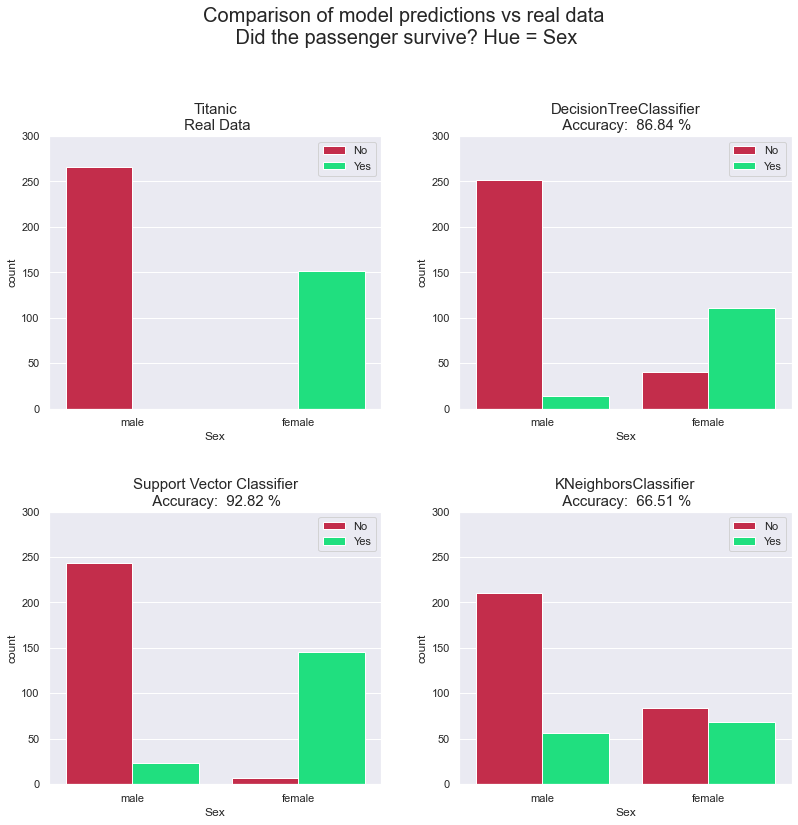

In [32]:
gender = pd.read_csv('./test.csv')
gender[['Sex']]

plt.figure(figsize=(12, 12))
plt.suptitle("Comparison of model predictions vs real data\n Did the passenger survive? Hue = Sex", fontsize=20)

f1 = plt.subplot(2, 2, 1)
plt.title("Titanic\n Real Data", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=gender['Sex'], hue=y2, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f2 = plt.subplot(2, 2, 2)
plt.title(f"DecisionTreeClassifier\n Accuracy:  {round(accuracyT,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=gender['Sex'], hue=yhatTree, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f3 = plt.subplot(2, 2, 3)
plt.title(f"Support Vector Classifier\n Accuracy:  {round(accuracyS,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=gender['Sex'], hue=yhatSVM, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f4 = plt.subplot(2, 2, 4)
plt.title(f"KNeighborsClassifier\n Accuracy:  {round(accuracyK,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=gender['Sex'], hue=yhatKNN, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


plt.show()


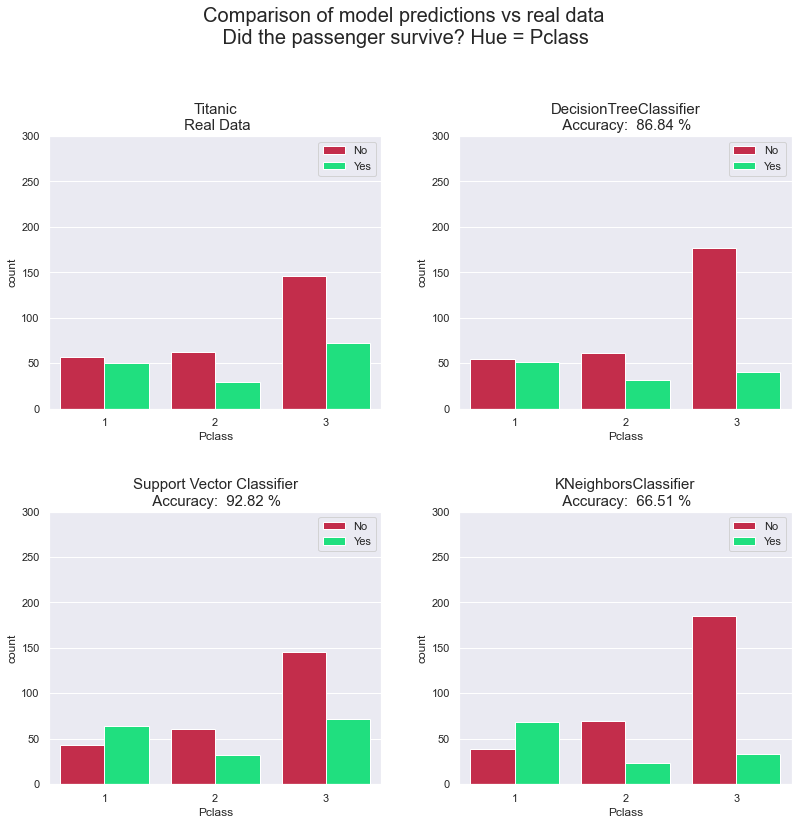

In [33]:
pclass = pd.read_csv('./test.csv')
pclass[['Pclass']]

plt.figure(figsize=(12, 12))
plt.suptitle("Comparison of model predictions vs real data\n Did the passenger survive? Hue = Pclass", fontsize=20)

f1 = plt.subplot(2, 2, 1)
plt.title("Titanic\n Real Data", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=pclass['Pclass'], hue=y2, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f2 = plt.subplot(2, 2, 2)
plt.title(f"DecisionTreeClassifier\n Accuracy:  {round(accuracyT,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=pclass['Pclass'], hue=yhatTree, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f3 = plt.subplot(2, 2, 3)
plt.title(f"Support Vector Classifier\n Accuracy:  {round(accuracyS,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=pclass['Pclass'], hue=yhatSVM, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


f4 = plt.subplot(2, 2, 4)
plt.title(f"KNeighborsClassifier\n Accuracy:  {round(accuracyK,2)} %", fontsize=15)
plt.tight_layout(pad=3)
plt.ylim(0, 300)
sns.countplot(x=pclass['Pclass'], hue=yhatKNN, palette=['crimson', 'springgreen'])
plt.legend(['No', 'Yes'])


plt.show()